# Capstone 1 'Occupation Analysis in New York State'
  The Dataset that I use is from data.gov, which is a semiannual survey of employers that measures occupational employment and occupational wage rates for wage and salary workers by industry(nonfarm-establishment). This dataset is constructed from a sample of about 51,000 establishments. This dataset only applies to regions in New York State. This dataset contains area names, occupational titles, employment, mean, median, entry, and experience wages. I chose this dataset because when people are looking for jobs, their top concern is probably salary and employment rate. When initially starting looking for jobs, people tends to look for jobs near home because they don’t know where is the best place for them to start, therefore this analysis will provide them comparison in each regions regarding salary and employment in different aspects. 
3 analytic questions that I want to ask and answer are:
1. What are the most popular jobs in each region (employment) ? 
2. Comparing all areas with all jobs available in each area, what is the mean wage of all jobs in each area and provide visualization
3. Compare top 2 areas with highest employment and mean wage to see how are wages and employment are distributed among all jobs 


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [78]:
#load dataset into notebook
df = pd.read_csv('Occupational_Employment_Statistics.csv')

In [79]:
#Change the column names properly because the old ones have improper indentation
df.columns = ['Area_Type','Area','Area_Name','Standard_Occupational_Code','Occupational_Title','Employment','Mean_Wage','Median_Wage','Entry_Wage','Experienced_wage']

In [80]:
#drop all NaN values 
df.dropna()
#get a summary statistics 
df.describe()

,Area_Type,Area,Employment,Mean_Wage,Median_Wage,Entry_Wage,Experienced_wage
count,6785.000000,6785.000000,5.513000e+03,6785.000000,6744.000000,6765.000000,6765.000000
mean,8.957406,8.991746,9.924538e+03,62687.026971,57449.763642,40925.494752,72669.435920
std,2.880550,10.147871,1.441141e+05,35480.915682,29804.101702,19976.735470,41313.910771
min,1.000000,1.000000,2.000000e+01,21632.000000,21632.000000,21632.000000,21632.000000
25%,10.000000,3.000000,2.000000e+02,37810.000000,35530.000000,25780.000000,43330.000000
50%,10.000000,6.000000,6.100000e+02,53310.000000,50035.000000,35280.000000,61820.000000
75%,10.000000,9.000000,2.290000e+03,77240.000000,71970.000000,49520.000000,90130.000000
max,10.000000,36.000000,9.207870e+06,309050.000000,212230.000000,190640.000000,305600.000000


## Q1. What are the most popular jobs in each region (employment) ?  
To answer the first analytic question I need to group the data by area name with the maximum of employment
because in the data there are indexes of each area with total occupation, which are going to be highest in values, 
therefore I need to drop the total occupations index out to see particular jobs with highest employment values.

In [81]:

# Remove 'Total, All Occupations' from Occupational Title column
Top_Jobs = df[df.Occupational_Title != 'Total, All Occupations']
# find the max of a column base on another column unique value
Top_Jobs.loc[Top_Jobs.groupby('Area_Name')['Employment'].idxmax(), :].reset_index().sort_values(by = ['Employment'])

,index,Area_Type,Area,Area_Name,Standard_Occupational_Code,Occupational_Title,Employment,Mean_Wage,Median_Wage,Entry_Wage,Experienced_wage
8,4712,10,8,North Country Region,43-0000,Office and Administrative Support Occupations,21710.0,36470,33940.0,24210.0,42590.0
5,1878,10,6,Mohawk Valley Region,43-0000,Office and Administrative Support Occupations,28170.0,36200,33530.0,24140.0,42240.0
9,3508,10,9,Southern Tier Region,43-0000,Office and Administrative Support Occupations,39320.0,37670,34400.0,24440.0,44290.0
1,2182,10,2,Central New York Region,43-0000,Office and Administrative Support Occupations,56760.0,39510,36180.0,24990.0,46760.0
0,2132,10,1,Capital Region,43-0000,Office and Administrative Support Occupations,86930.0,41070,37830.0,26170.0,48510.0
2,4070,10,3,Finger Lakes Region,43-0000,Office and Administrative Support Occupations,88130.0,39130,35700.0,25400.0,45990.0
10,4269,10,10,Western New York Region,43-0000,Office and Administrative Support Occupations,103100.0,38110,35320.0,24780.0,44780.0
3,1128,10,4,Hudson Valley Region,43-0000,Office and Administrative Support Occupations,150360.0,43080,39100.0,25150.0,52040.0
4,4274,10,5,Long Island Region,43-0000,Office and Administrative Support Occupations,234070.0,44340,41300.0,26250.0,53380.0
6,1397,10,7,New York City Region,43-0000,Office and Administrative Support Occupations,667930.0,47540,42560.0,26720.0,57950.0


The office administrative support occupations job title has the most employment in all areas 

## Q2. Comparing all areas with all jobs available in each area, what is the mean wage of all jobs in each area ? and provide visualization.

In [82]:
#group all jobs by area names which will provide information of each area's all occupations values
Total_Occupation = df.loc[df.groupby('Area_Name')['Employment'].idxmax(), :].reset_index().sort_values(by = 'Employment',ascending = False)
Total_Occupation
#because the dataset already provide the indexes of total occupations in each area already we can use that data to
#make a visualization


,index,Area_Type,Area,Area_Name,Standard_Occupational_Code,Occupational_Title,Employment,Mean_Wage,Median_Wage,Entry_Wage,Experienced_wage
7,6499,1,36,New York State,00-0000,"Total, All Occupations",9207870.0,61460,44680.0,24480.0,79960.0
6,3734,10,7,New York City Region,00-0000,"Total, All Occupations",4210980.0,70230,50580.0,25470.0,92610.0
4,4477,10,5,Long Island Region,00-0000,"Total, All Occupations",1303150.0,59150,44290.0,24620.0,76420.0
3,344,10,4,Hudson Valley Region,00-0000,"Total, All Occupations",947050.0,58300,43220.0,24580.0,75160.0
10,2514,10,10,Western New York Region,00-0000,"Total, All Occupations",639730.0,48270,37260.0,23310.0,60740.0
2,6086,10,3,Finger Lakes Region,00-0000,"Total, All Occupations",557030.0,50180,39080.0,24000.0,63270.0
0,1239,10,1,Capital Region,00-0000,"Total, All Occupations",525090.0,52840,41600.0,24720.0,66900.0
1,5835,10,2,Central New York Region,00-0000,"Total, All Occupations",345500.0,50260,38970.0,23840.0,63470.0
9,1354,10,9,Southern Tier Region,00-0000,"Total, All Occupations",260520.0,49460,38280.0,23470.0,62460.0
5,1271,10,6,Mohawk Valley Region,00-0000,"Total, All Occupations",193190.0,45400,35510.0,22870.0,56660.0


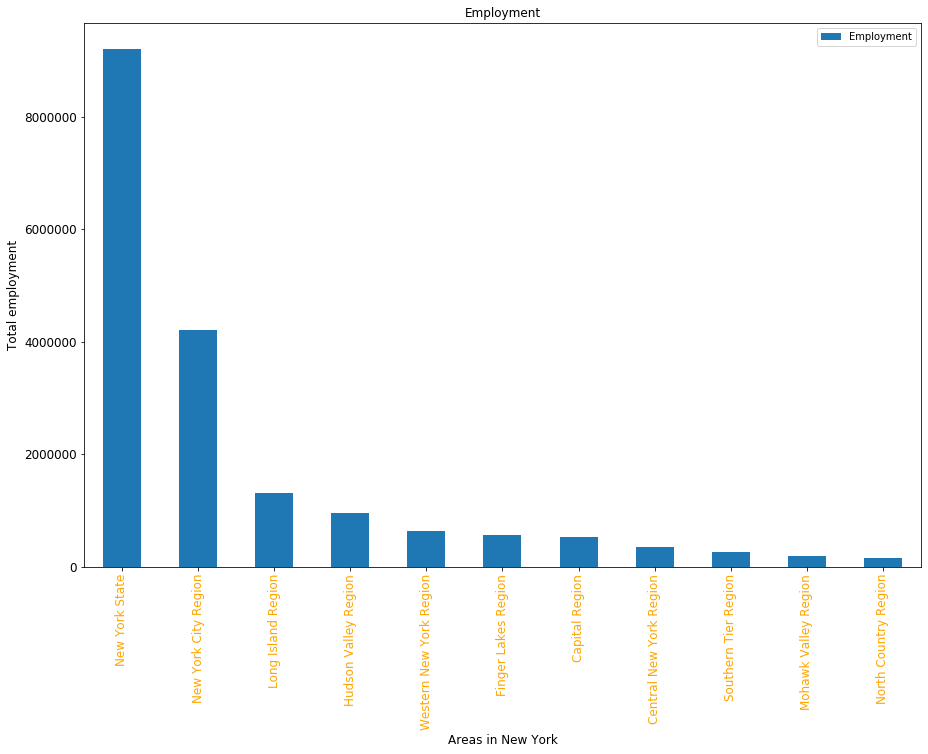

In [83]:
#produce a visualization of the Employment to clearly see how each regions do in term of employment
#make a list of all area names, which will be use to count later
Area_Name_list = Total_Occupation["Area_Name"].tolist()

#create a variable that will represent the bar graphs with all necessary values
ax = Total_Occupation[['Employment']].plot(kind='bar', title ="Employment", figsize=(15, 10), legend=True, fontsize=12)
#label each axis
ax.set_xlabel("Areas in New York", fontsize=12)
ax.set_ylabel("Total employment", fontsize=12)
#to make the x-axis becomes area names we need to create the spacing between each area equally 
y_pos = np.arange(len(Area_Name_list))
#now change the x-axis labels into area names and change the color
plt.xticks(y_pos, Area_Name_list, color='orange')
plt.show()

As we can see from the graph New York City, Long Island Hudsin Valley regions are top 3 reagrding Employment
New York State doesn't count becaues it is the total of all regions

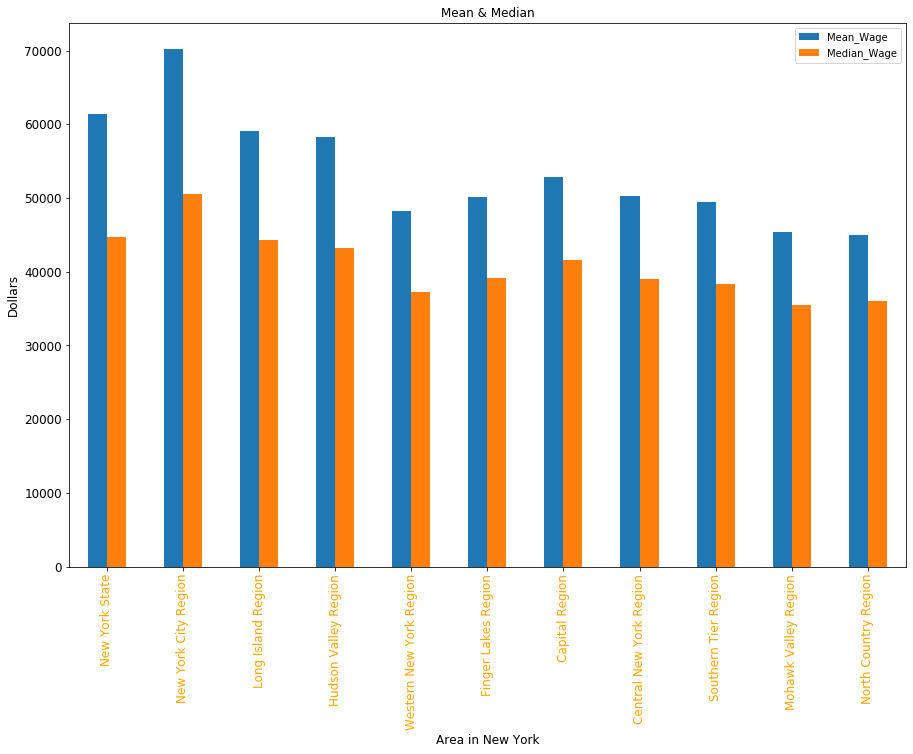

In [84]:
#Let's see from mean and median wages perspective
ax = Total_Occupation[['Mean_Wage','Median_Wage']].plot(kind='bar', title ="Mean & Median", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Area in New York", fontsize=12)
ax.set_ylabel("Dollars", fontsize=12)
y_pos = np.arange(len(Area_Name_list))

plt.xticks(y_pos, Area_Name_list, color='orange')
plt.show()

We can derive from this graph that most values in the data set is higher than average the mean in New York City region is higher than the mean of all regions combined(New York State)

## Q3. Compare top 2 areas with highest employment and mean wage to see how are wages and employment are distributed among all jobs  ?

In [85]:
#let's start with the top employment area, New York City
NYC_Region = Top_Jobs.loc[Top_Jobs['Area_Name'] == 'New York City Region']
#isolate only New York City region values and exclude total occupations job title by using Top_Jobs 
NYC_Region = NYC_Region.dropna()
#drop all NaN values
NYC_Region.sort_values(by = 'Occupational_Title')
#find the mean of the Employment in NYC region
NYC_mean_employment = np.mean(NYC_Region['Employment'])
print('The average of employment in all occupations in NYC is ',NYC_mean_employment)
#find the median of the Employment in NYC region 
NYC_median_employment = np.median(NYC_Region['Employment'])
print('The median of employment in all occupations in NYC is ',NYC_median_employment)
#find std of the Employment in NYC region
NYC_std_employment = np.std(NYC_Region['Employment'], ddof=1) 
print('The standard diviation of employment in all occupations in NYC is ',NYC_std_employment)
#As of now what I derive from these 3 statistics is that the mean is much higher than the median and std is very high
#therefore it means that the data are spread out from the mean 
NYC_Region.describe()


The average of employment in all occupations in NYC is  15414.897959183674
The median of employment in all occupations in NYC is  2780.0
The standard diviation of employment in all occupations in NYC is  49524.21724580078


,Area_Type,Area,Employment,Mean_Wage,Median_Wage,Entry_Wage,Experienced_wage
count,539.0,539.0,539.000000,539.000000,539.000000,539.000000,539.000000
mean,10.0,7.0,15414.897959,74172.448980,68776.530612,45550.111317,88719.591837
std,0.0,0.0,49524.217246,38665.249769,35410.473390,20638.415519,48613.561502
min,10.0,7.0,250.000000,24960.000000,24960.000000,24960.000000,24960.000000
25%,10.0,7.0,915.000000,43960.000000,40950.000000,27360.000000,51140.000000
50%,10.0,7.0,2780.000000,66170.000000,62830.000000,41300.000000,77330.000000
75%,10.0,7.0,8110.000000,94450.000000,89515.000000,57025.000000,111285.000000
max,10.0,7.0,667930.000000,226010.000000,212230.000000,129190.000000,275610.000000


In [86]:
#second top employment area is long Island region 
LIL_Region = Top_Jobs.loc[Top_Jobs['Area_Name'] == 'Long Island Region']
LIL_Region = LIL_Region.dropna()
LIL_Region.sort_values(by = 'Occupational_Title')
LIL_mean_employment = np.mean(LIL_Region['Employment'])
print('The average of employment in all occupations in LIL is ',LIL_mean_employment)
LIL_median_employment = np.median(LIL_Region['Employment'])
print('The median of employment in all occupations in LIL is ',LIL_median_employment)
LIL_std_employment = np.std(LIL_Region['Employment'], ddof=1) 
print('The standard diviation of employment in all occupations in LIL is ',LIL_std_employment)
#The standard diviation of employment for LIL is also high, therefore the data also spread out from the mean 
LIL_Region.describe()

The average of employment in all occupations in LIL is  5063.201581027668
The median of employment in all occupations in LIL is  925.0
The standard diviation of employment in all occupations in LIL is  16622.371422567227


,Area_Type,Area,Employment,Mean_Wage,Median_Wage,Entry_Wage,Experienced_wage
count,506.0,506.0,506.000000,506.000000,506.000000,506.000000,506.000000
mean,10.0,5.0,5063.201581,67112.924901,62576.482213,43320.316206,79077.905138
std,0.0,0.0,16622.371423,34305.106518,32268.521912,21308.539215,41655.251051
min,10.0,5.0,100.000000,22880.000000,22880.000000,22880.000000,22880.000000
25%,10.0,5.0,360.000000,40545.000000,37575.000000,26102.500000,47037.500000
50%,10.0,5.0,925.000000,59875.000000,57000.000000,37750.000000,71195.000000
75%,10.0,5.0,2730.000000,86117.500000,79000.000000,52385.000000,101595.000000
max,10.0,5.0,234070.000000,225090.000000,196540.000000,141520.000000,266870.000000


15414.897959183674 49524.21724580078
5063.201581027668 16622.371422567227


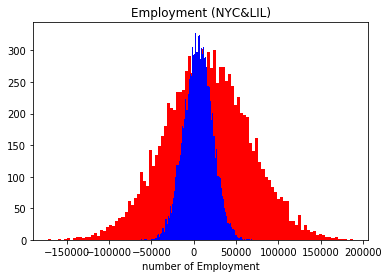

In [87]:
#Now let's put these data into visualization
print(NYC_mean_employment, NYC_std_employment)
print(LIL_mean_employment, LIL_std_employment)
#construct a normal distribution of NYC and LIL mean and standard deviation
samples_NYC = np.random.normal(NYC_mean_employment, NYC_std_employment, size=10000)
samples_LIL = np.random.normal(LIL_mean_employment, LIL_std_employment, size=10000)
#plot a histrogram with bins 100, red for NYC, blue for LIL
plt.hist(samples_NYC,bins= 100, color='red')
plt.hist(samples_LIL,bins= 100, color='blue')
#make a title of the graph
plt.title('Employment (NYC&LIL)')
plt.xlabel('number of Employment')
plt.show()


In [88]:
#Now let's find the statistics of top mean wages area, New York City
#find the mean of the mean wage in NYC region
NYC_mean_meanwage = np.mean(NYC_Region['Mean_Wage'])
print('The average of mean wage in all occupations in NYC is ',NYC_mean_meanwage)
#find the median of the mean wage in NYC region 
NYC_median_medianwage = np.median(NYC_Region['Mean_Wage'])
print('The median of mean wage in all occupations in NYC is ',NYC_median_medianwage)
#find std of the mean wage in NYC region
NYC_std_meanwage = np.std(NYC_Region['Mean_Wage'], ddof=1) 
print('The standard diviation of mean wage in all occupations in NYC is ',NYC_std_meanwage)
#As of now what I derive from these 3 statistics is that the mean is much higher than the median and std is very high
#therefore it means that the data are spread out from the mean 

The average of mean wage in all occupations in NYC is  74172.44897959183
The median of mean wage in all occupations in NYC is  66170.0
The standard diviation of mean wage in all occupations in NYC is  38665.24976922118


In [89]:
#The second top mean wage is still Long Island region
LIL_mean_meanwage = np.mean(LIL_Region['Mean_Wage'])
print('The average of mean wage in all occupations in LIL is ',LIL_mean_meanwage)
LIL_median_meanwage = np.median(LIL_Region['Mean_Wage'])
print('The median of mean wage in all occupations in LIL is ',LIL_median_meanwage)
LIL_std_meanwage = np.std(LIL_Region['Mean_Wage'], ddof=1) 
print('The standard diviation of mean wage in all occupations in LIL is ',LIL_std_meanwage)
#The standard diviation of employment for LIL is also high, therefore the data also spread out from the mean 

The average of mean wage in all occupations in LIL is  67112.92490118578
The median of mean wage in all occupations in LIL is  59875.0
The standard diviation of mean wage in all occupations in LIL is  34305.10651798345


74172.44897959183 38665.24976922118
67112.92490118578 34305.10651798345


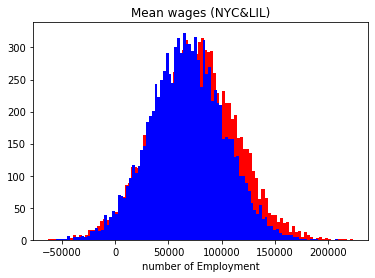

In [90]:
print(NYC_mean_meanwage, NYC_std_meanwage)
print(LIL_mean_meanwage, LIL_std_meanwage)
samples_NYC = np.random.normal(NYC_mean_meanwage, NYC_std_meanwage, size=10000)
samples_LIL = np.random.normal(LIL_mean_meanwage, LIL_std_meanwage, size=10000)
plt.hist(samples_NYC,bins= 100, color='red')
plt.hist(samples_LIL,bins= 100, color='blue')
plt.title('Mean wages (NYC&LIL)')
plt.xlabel('number of Employment')
plt.show()

## Conclusion
What I can derived from the graph is that the blue graph (Long Island Region) for employment, it is more narrow than the red graph (New York region), which means that the employment among all jobs in New York region are distributed far from the mean, therefore looking for a specific job in New York region might be harder than in Long Island region. For the mean wage, Long Island region's graph is also a little bit more narrow than the New York region's graph, which means that most mean wages of occupations in Long Island region are closer to the mean, therefore looking for jobs in Long Island region is less risky than in New York city region, even though, in New York city region has higher overall employment and mean wages.   

## Propose for further research
As of now with all things I have learned, I can only perform basic statistics with this dataset, but for future research when I learned deep more about data science, I want to be able to determine the dependant and independant variables, in order to perform a regression analysis, which I think I can construct a model that provides information to answer my question that which area and what job would be best fit for a particular person with specific experience and knowledge that will help guide them to find the suitable job efficiently.